# Problem Set 2

## Problem 1: Diabetes (3 points)

Load the scikit-learn [diabetes data set](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) using `sklearn.datasets.load_diabetes` (see code below). This data set describes diabetes progression for $n=442$ patients. The relevant columns we will study here are as follows.

| Variable | Symbol | Description                            | Units |
| -------- | ------ | -------------------------------------- | ----- |
| `age`    | $x_1$  | age                                    | Years |
| `sex`    | $x_2$  | sex of the patient (encoded as 1 or 2) | -     |
| `bmi`    | $x_3$  | body mass index                        | kg/m² |
| `bp`     | $x_4$  | blood pressure                         | mmHg  |
| `target` | $y$    | measure of diabetes progression        | -     |

In this exercise, we build a simple, multi-dimensional linear regression model, i.e.,
$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \epsilon \, ,$$
where $\epsilon$ is homoscedastic noise.

(a) What are the best-fit coefficients, $\mathbf{\hat \beta} = (\hat \beta_0, \hat \beta_1, \hat \beta_2, \hat \beta_3, \hat \beta_4)$, assuming homoscedasticity?

(b) Make a scatter plot of the predicted vs. the observed $y$ values. What is the mean squared error (MSE), $\mathrm{MSE} = \frac{1}{n} \sum\limits_{i=1}^{n} (y_i - \hat y_i)^2$, where $\hat y_i$ is the best-fit prediction for patient $i$?

(c) Assuming a standard deviation $\sigma_y$ of $60$ for $y$, determine whether there are significant trends in diabetes with age, sex, BMI, or blood pressure. We will call an estimated slope $\hat\beta_i$ statistically significant if it is at least $3$ standard deviations $\sigma_{\hat\beta_i}$ away from $0$. (Hint: Remember that $\mathrm{Var}(\hat\beta) = \sigma_y^2 (\mathbf{X}^T \mathbf{X})^{-1}$.)

Beta0: 205.82990301066044
Beta1: 105.33173896812153
Beta2: 182.5372431064736
Beta3: 129.17349824360778
Beta4: 137.56394829306274
MSE = 3556.3831672074466
[[ 5.19268426e+02 -7.63141326e-01 -2.08756776e+01 -7.02794945e+00
  -2.72673617e+00]
 [-7.63141326e-01  5.42908041e-02 -1.41185152e-01 -1.01504045e-02
  -1.47486382e-02]
 [-2.08756776e+01 -1.41185152e-01  3.50970282e+01  5.96160327e-02
  -2.68160378e-01]
 [-7.02794945e+00 -1.01504045e-02  5.96160327e-02  4.97637802e-01
  -6.01466314e-02]
 [-2.72673617e+00 -1.47486382e-02 -2.68160378e-01 -6.01466314e-02
   5.72915477e-02]]


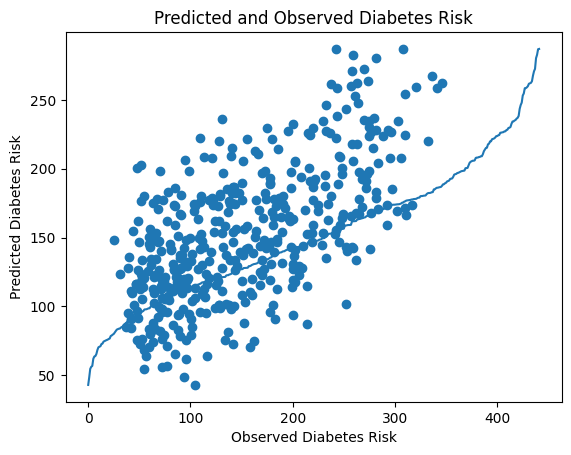

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

data = load_diabetes(as_frame=True, scaled=False)
df = data.data
df['target'] = data.target

# returns design matrix, y
def design_matrix():
    # initialize variables
    x1 = df["age"]
    x2 = df["sex"]
    x3 = df["bmi"]
    x4 = df["bp"]
    y = df["target"]

    # fill design matrix
    X = np.empty((len(df), 5))
    for row in range(len(X)):
        for col in range(len(X[0])):
            # going vertically, so columns should remain the same
            match col:
                case 0:
                    X[row][col] = 1
                case 1:
                    X[row][col] = x1[row]
                case 2:
                    X[row][col] = x2[row]
                case 3:
                    X[row][col] = x3[row]
                case 4:
                    X[row][col] = x4[row]
    return X, y

# prints and returns coefficients
def find_coeff():
    X, y = design_matrix()

    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    coeff = X @ beta
    print(f"Beta0: {coeff[0]}\nBeta1: {coeff[1]}\nBeta2: {coeff[2]}\nBeta3: {coeff[3]}\nBeta4: {coeff[4]}")
    return coeff

def run_regression():
    X, y = design_matrix()
    reg = LinearRegression(fit_intercept=False).fit(X, y)
    y_pred = reg.predict(X)

    plt.scatter(y, y_pred)
    plt.title("Predicted and Observed Diabetes Risk")
    plt.xlabel('Observed Diabetes Risk')
    plt.ylabel('Predicted Diabetes Risk')
    print(f"MSE = {mean_squared_error(y, y_pred)}")

    # ???????
    plt.plot(sorted(y_pred))



# ???????
def significant_sd():
    sd = 60
    X, y = design_matrix()

    var = sd ** 2 * np.linalg.inv(X.T @ X)
    print(var)




find_coeff()
run_regression()
significant_sd()

## Problem 2: Exoplanets (3 points)

In this exercise, we will try to detect a (simulated) exoplanet. One way to detect exoplanets is by detecting a wobbling of the host star as the gravity of the planet pulls on it. Assuming no orbital eccentricity and a period of exactly one year, the measured velocity (in m/s) of the star as a function of time $t$ (in years) can be described by
$$v(t) = A \sin \left( 2 \pi t + B \right) \, ,$$
where $A$ is the amplitude of the wobbling and $B$ a phase offset. We can re-write this equation into a convenient linear form,
$$v(t) = \beta_0 \sin \left( 2 \pi t \right) + \beta_1 \cos \left( 2 \pi t \right) \, ,$$
where $\beta_0$ and $\beta_1$ are regression coefficients. $A$, the amplitude, is related to the coefficients via $A^2 = \beta_0^2 + \beta_1^2$.

The measured data is provided in `Problem_Set_2_Exoplanets.csv`.

(a) Make a scatter plot of the measured velocity as a function of time.

(b) Determine the best-fit model and overplot it on the scatter plot.

(c) Calculate the uncertainties on the coefficients $\mathbf{\beta}$ assuming $\sigma_v = 1 \mathrm{m} / \mathrm{s}$. Show that the off-diagonal element $\mathrm{Cov}(\beta_0, \beta_1) = \sigma_{\beta_0} \sigma_{\beta_1} r_{\beta_0 \beta_1}$ is close to zero, and therefore the coefficients are approximately uncorrelated. In that case, the uncertainty on the amplitude $A$ can be derived via error propagation, $\sigma_A = \frac{1}{A} \sqrt{\beta_0^2 \sigma_{\beta_0}^2 + \beta_1^2 \sigma_{\beta_1}^2}$. What is the amplitude and its associated uncertainty (standard deviation)? Please include proper units.

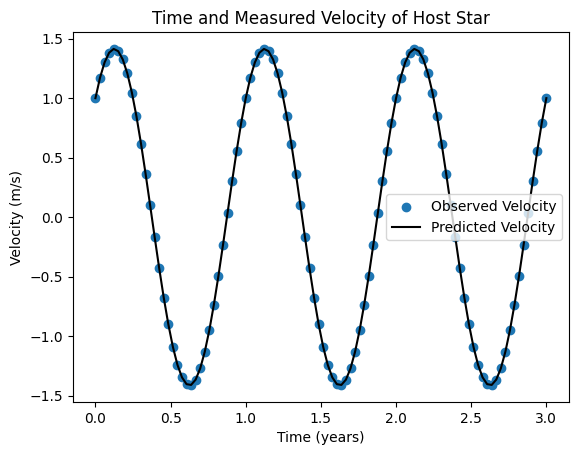

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import math

df = pd.read_csv("Problem_Set_2_Exoplanets.csv")
t_list = df["t"]
v_list = df["v"]

# returns measured velocity and design matrix
def design_matrix():
    velocity_list = [0] * len(df)

    X = np.empty((len(df), 2))
    for row in range(len(X)):
        for col in range(len(X[0])):
            # going vertically, so columns should remain the same
            match col:
                case 0:
                    X[row][col] = math.sin(2 * math.pi * t_list[row])
                    velocity_list[row] += X[row][col]
                case 1:
                    X[row][col] = math.cos(2 * math.pi * t_list[row])
                    velocity_list[row] += X[row][col]


    return X, velocity_list

# returns beta0, beta1, amp
def coefficients():
    X, y = design_matrix()

    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    beta0, beta1 = X @ beta
    amp = math.sqrt(beta0 ** 2 + beta1 ** 2)
    return beta0, beta1, amp

def uncertainty():
    beta0, beta1, amp = coefficients()
    sd = 1

    # what is r? (r^2)?
    # what is cov
    # how is sigma_v different from sigma_beta0/beta1?



def plot_data():
    # plot data as scatter
    X, y = design_matrix()
    plt.scatter(t_list, y, label = "Observed Velocity")
    plt.xlabel("Time (years)")
    plt.ylabel("Velocity (m/s)")
    plt.title("Time and Measured Velocity of Host Star")

    # overplot prediction
    reg = LinearRegression(fit_intercept=False).fit(X, y)
    y_pred = reg.predict(X)
    plt.plot(t_list, y_pred, color = "black", label = "Predicted Velocity")
    plt.legend(loc = "best")
    plt.show()

plot_data()